In [2]:
import pandas as pd
import numpy as np

# Employee data
employees = [
    {"name": "Luis", "position": "Outside Sales"},
    {"name": "Matthew", "position": "Assistant Manager"},
    {"name": "Eddie", "position": "Sales Associate"},
    {"name": "Eduardo", "position": "General Manager"},
    {"name": "Jaime", "position": "Assistant Manager"},
    {"name": "Cesar", "position": "General Manager"},
    {"name": "Gabby", "position": "Sales Associate"},
    {"name": "Sean", "position": "Outside Sales"},
    {"name": "Joe", "position": "Outside Sales"},
    {"name": "Austin", "position": "Sales Associate"},
    {"name": "JJ", "position": "General Manager"},
    {"name": "Campbell", "position": "Sales Associate"},
    {"name": "Tony", "position": "Sales Associate"},
    {"name": "Jarrod", "position": "Sales Associate"},
    {"name": "Jeffrey", "position": "Sales Associate"}
]

# Generate random data
np.random.seed(0)
num_employees = len(employees)
data = {
    "Name": [employee["name"] for employee in employees],
    "Position": [employee["position"] for employee in employees],
    "Customer Satisfaction": np.random.randint(70, 100, num_employees),
    "Performance Ratings": np.random.randint(1, 5, num_employees),
    "Training Hours Completed": np.random.randint(5, 50, num_employees),
    "Scores from Training Assessments": np.random.randint(50, 100, num_employees),
    "Types of Training Completed": np.random.choice(['Sales', 'Customer Service', 'Management', 'Technical'], num_employees),
    "Attendance Records": np.random.randint(90, 100, num_employees),
    "Feedback from Peers and Managers": np.random.choice(['Positive', 'Neutral', 'Negative'], num_employees),
    "Readiness for Managerial Roles": np.random.choice(['High', 'Medium', 'Low'], num_employees),
    "Need for Further Training or Support": np.random.choice(['Yes', 'No'], num_employees),
    "Strengths and Areas for Improvement": np.random.choice(['Strength in Sales', 'Needs Improvement in Technical Skills', 'Good Leadership Qualities', 'Needs Improvement in Customer Service'], num_employees)
}

# Create DataFrame
df = pd.DataFrame(data)

df.head()


,Name,Position,Customer Satisfaction,Performance Ratings,Training Hours Completed,Scores from Training Assessments,Types of Training Completed,Attendance Records,Feedback from Peers and Managers,Readiness for Managerial Roles,Need for Further Training or Support,Strengths and Areas for Improvement
0,Luis,Outside Sales,82,1,14,51,Sales,93,Positive,High,Yes,Good Leadership Qualities
1,Matthew,Assistant Manager,85,1,25,59,Sales,96,Positive,Medium,No,Needs Improvement in Customer Service
2,Eddie,Sales Associate,91,1,21,82,Customer Service,97,Negative,Low,Yes,Strength in Sales
3,Eduardo,General Manager,70,3,10,81,Technical,92,Positive,High,No,Needs Improvement in Technical Skills
4,Jaime,Assistant Manager,73,2,20,60,Sales,90,Negative,Low,No,Good Leadership Qualities


In [3]:
df.tail()

,Name,Position,Customer Satisfaction,Performance Ratings,Training Hours Completed,Scores from Training Assessments,Types of Training Completed,Attendance Records,Feedback from Peers and Managers,Readiness for Managerial Roles,Need for Further Training or Support,Strengths and Areas for Improvement
10,JJ,General Manager,91,2,24,50,Customer Service,96,Neutral,High,No,Strength in Sales
11,Campbell,Sales Associate,88,2,24,50,Customer Service,94,Neutral,Medium,Yes,Good Leadership Qualities
12,Tony,Sales Associate,74,2,19,86,Technical,94,Positive,Medium,No,Good Leadership Qualities
13,Jarrod,Sales Associate,93,2,44,55,Customer Service,93,Neutral,High,No,Needs Improvement in Customer Service
14,Jeffrey,Sales Associate,76,1,37,88,Customer Service,94,Negative,Low,Yes,Strength in Sales


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Extract features and scale them
features = df.drop(columns=['Name', 'Position'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [5]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])


In [6]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster information to the DataFrame
pca_df['Cluster'] = clusters
pca_df['Name'] = df['Name']
pca_df['Position'] = df['Position']

# Display the DataFrame
print(pca_df.head())


       PCA1      PCA2  Cluster  Name  Position
0 -1.113587  1.402856        0    11         2
1 -0.431065  0.062411        0    12         0
2  2.723186 -1.151908        1     3         3
3 -2.447515  0.992153        0     4         1
4 -1.222867  0.832871        0     7         0


In [8]:
# Determine feature influence on each principal component
pca_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=features.columns)
print(pca_weights)


                                          PCA1      PCA2
Customer Satisfaction                 0.398788  0.274037
Performance Ratings                  -0.195497  0.045223
Training Hours Completed              0.265670 -0.295279
Scores from Training Assessments     -0.125772 -0.483567
Types of Training Completed          -0.528082 -0.098261
Attendance Records                    0.276530 -0.244445
Feedback from Peers and Managers     -0.405928  0.153167
Readiness for Managerial Roles       -0.112719 -0.547902
Need for Further Training or Support  0.076273 -0.450425
Strengths and Areas for Improvement   0.421558 -0.076706


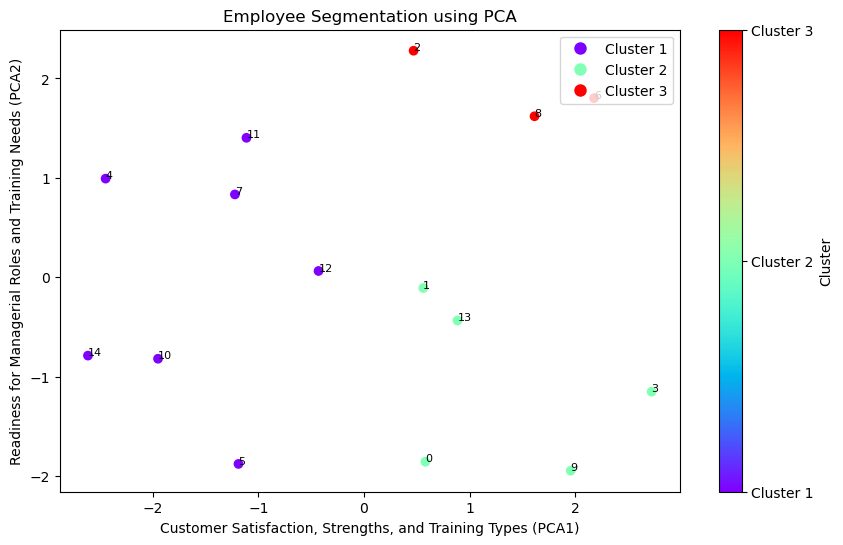

In [10]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a scatter plot with a colormap
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='rainbow')

# Add annotations for each employee
for i, txt in enumerate(pca_df['Name']):
    plt.annotate(txt, (pca_df['PCA1'][i], pca_df['PCA2'][i]), fontsize=8)

# Add color bar and labels
colorbar = plt.colorbar(scatter, ticks=[0, 1, 2])
colorbar.set_label('Cluster')
colorbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

# Label the axes with the most influential features
plt.xlabel('Customer Satisfaction, Strengths, and Training Types (PCA1)')
plt.ylabel('Readiness for Managerial Roles and Training Needs (PCA2)')
plt.title('Employee Segmentation using PCA')

# Add a legend to explain clusters
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.rainbow(i/2), markersize=10) for i in range(3)]
plt.legend(legend_labels, ['Cluster 1', 'Cluster 2', 'Cluster 3'], loc='upper right')

# Show the plot
plt.show()


# Explanation

PCA1 (X-axis): Primarily influenced by Customer Satisfaction, Strengths and Areas for Improvement, and Types of Training Completed. This suggests that the horizontal spread of the points is related to these features.

PCA2 (Y-axis): Primarily influenced by Readiness for Managerial Roles and Need for Further Training or Support. This suggests that the vertical spread of the points is related to these features.

The color coding on the PCA plot represents different clusters of employees, which are groups of employees with similar performance metrics and training needs. Here is a detailed explanation of what each color represents, along with examples:

### Color Coding and Cluster Explanation

1. **Purple (Cluster 1)**
    - This cluster groups employees who have similar characteristics in terms of Customer Satisfaction, Strengths and Areas for Improvement, and Types of Training Completed (PCA1).
    - They may also share similarities in Readiness for Managerial Roles and Training Needs (PCA2).

    **Example Employees:**
    - Employee 4
    - Employee 11
    - Employee 14

    These employees might have moderate customer satisfaction scores and require additional training or development to enhance their managerial skills.

2. **Green (Cluster 2)**
    - This cluster represents employees with distinct characteristics in terms of the same features.
    - Employees in this cluster are likely ready for managerial roles and may not require much additional training.

    **Example Employees:**
    - Employee 1
    - Employee 13
    - Employee 0

    These employees might already be high performers, showing strong customer satisfaction and readiness for leadership positions.

3. **Red (Cluster 3)**
    - This cluster groups employees with another set of characteristics.
    - Employees in this cluster may have high customer satisfaction and strengths, but might have specific training needs that should be addressed.

    **Example Employees:**
    - Employee 2
    - Employee 6
    - Employee 8

    These employees might be excelling in their current roles but require targeted training to prepare them for future responsibilities.

### How to Use This Information

1. **Personalized Training Programs**:
    - For **Cluster 1 (Purple)**, focus on basic training programs to improve their overall performance and prepare them for more responsibilities.
    - For **Cluster 2 (Green)**, provide advanced training or leadership programs to harness their potential and move them into managerial roles.
    - For **Cluster 3 (Red)**, design specific training sessions to address their unique needs and strengthen their existing skills.

2. **Performance Reviews**:
    - Use the cluster information during performance reviews to highlight strengths and address areas for improvement.
    - For **Cluster 1**, identify areas needing basic skill improvements.
    - For **Cluster 2**, discuss opportunities for leadership and advanced projects.
    - For **Cluster 3**, provide feedback on their current performance and specific areas to focus on for further growth.

3. **Employee Development Plans**:
    - Develop tailored development plans for each cluster to ensure they receive the support and resources they need to succeed.
    - For **Cluster 1**, focus on foundational skills and overall performance enhancement.
    - For **Cluster 2**, provide opportunities for advanced roles and leadership experiences.
    - For **Cluster 3**, offer specialized training and development resources to address their unique needs.

### Example Usage
- **Cluster 1 (Purple)**: Employee 4 might need additional training in customer service to improve satisfaction scores.
- **Cluster 2 (Green)**: Employee 1 might be ready for a leadership training program based on their strong performance metrics.
- **Cluster 3 (Red)**: Employee 2 might excel in customer satisfaction but may need targeted training in technical skills to prepare for a managerial role.

By understanding the color coding and cluster characteristics, you can make more informed and targeted decisions about employee development and training needs.